## 라이브러리 로딩

In [1]:
!pip install sklearn

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor # 머신러닝 알고리즘 모형 중
import numpy as np
import matplotlib.pyplot as plt

## 데이터 로딩 및 확인

In [101]:
train = pd.read_csv('data/train.csv') 
test = pd.read_csv('data/test.csv')

In [102]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [103]:
train

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


In [104]:
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


- id 고유 id
- hour 시간
- temperature 기온
- precipitation 비가 오지 않았으면 0, 비가 오면 1
- windspeed 풍속(평균)
- humidity 습도
- visibility 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
- ozone 오존
- pm10 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
- pm2.5 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
- count 시간에 따른 따릉이 대여 수 (label)

In [105]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [106]:
test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


## 결측치 확인 및 처리

In [107]:
train.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [108]:
test.isnull().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [109]:
train[ train['hour_bef_ozone'].isnull() ].index

Int64Index([  14,   44,   46,   84,  122,  140,  142,  147,  158,  176,  222,
             236,  244,  265,  289,  317,  324,  331,  356,  422,  429,  451,
             463,  466,  472,  479,  507,  532,  537,  554,  576,  579,  589,
             595,  623,  624,  631,  645,  649,  660,  686,  698,  708,  728,
             745,  763,  778,  796,  811,  861,  868,  876,  897,  934,  957,
             970, 1024, 1035, 1070, 1100, 1120, 1142, 1154, 1156, 1165, 1168,
            1186, 1211, 1221, 1273, 1278, 1283, 1322, 1329, 1361, 1391],
           dtype='int64')

In [110]:
train.loc[0,'hour']

20

In [111]:
#train.fillna(0,inplace = True)
#test.fillna(0,inplace = True)

# 시간별 평균값으로 na 채우기

def fill_na(df,column):
    print('column : ',column)
    hour_mean = train.groupby('hour').mean()[column]
    
    na_index_list = list( train[ train[column].isnull() ].index )
    
    for ind in na_index_list:
        df.loc[ind, column] = hour_mean[ train.loc[ind,'hour'] ]
        if np.isnan(hour_mean[ train.loc[ind,'hour'] ]):
            df.loc[ind, column] = train[column].mean()
    
    
fill_na(train,'hour_bef_temperature')
fill_na(test,'hour_bef_temperature')

fill_na(train,'hour_bef_windspeed')
fill_na(test,'hour_bef_windspeed')

fill_na(train,'hour_bef_humidity')
fill_na(test,'hour_bef_humidity')

fill_na(train,'hour_bef_windspeed')
fill_na(test,'hour_bef_windspeed')

fill_na(train,'hour_bef_visibility')
fill_na(test,'hour_bef_visibility')

fill_na(train,'hour_bef_ozone')
fill_na(test,'hour_bef_ozone')

fill_na(train,'hour_bef_pm10')
fill_na(test,'hour_bef_pm10')

fill_na(train,'hour_bef_pm2.5')
fill_na(test,'hour_bef_pm2.5')


train.fillna(0,inplace = True)
test.fillna(0,inplace = True)



column :  hour_bef_temperature
column :  hour_bef_temperature
column :  hour_bef_windspeed
column :  hour_bef_windspeed
column :  hour_bef_humidity
column :  hour_bef_humidity
column :  hour_bef_windspeed
column :  hour_bef_windspeed
column :  hour_bef_visibility
column :  hour_bef_visibility
column :  hour_bef_ozone
column :  hour_bef_ozone
column :  hour_bef_pm10
column :  hour_bef_pm10
column :  hour_bef_pm2.5
column :  hour_bef_pm2.5


In [112]:
# id 컬럼 제거
train = train.drop(['id',
                    'hour_bef_pm10',
                    'hour_bef_pm2.5',
                    'hour_bef_precipitation',
                    'hour_bef_ozone',
                    'hour_bef_humidity',
                    'hour_bef_windspeed'],axis=1)

test = test.drop(['id','hour_bef_pm10','hour_bef_pm2.5','hour_bef_precipitation',
                  'hour_bef_ozone',
                  'hour_bef_humidity',
                  'hour_bef_windspeed'],axis=1)


In [113]:
train

,hour,hour_bef_temperature,hour_bef_visibility,count
0,20,16.3,576.0,49.0
1,13,20.1,916.0,159.0
2,6,13.9,1382.0,26.0
3,23,8.1,946.0,57.0
4,18,29.5,2000.0,431.0
...,...,...,...,...
1454,4,16.8,2000.0,21.0
1455,3,10.8,2000.0,20.0
1456,5,18.3,2000.0,22.0
1457,21,20.7,1395.0,216.0


In [114]:
# circular hour
import matplotlib.pyplot as plt


train['hour_sin'] = np.sin(2 * np.pi * train['hour']/24.0)
train['hour_cos'] = np.cos(2 * np.pi * train['hour']/24.0)

test['hour_sin'] = np.sin(2 * np.pi * test['hour']/24.0)
test['hour_cos'] = np.cos(2 * np.pi * test['hour']/24.0)

train = train.drop(['hour'],axis=1)
test = test.drop(['hour'],axis=1)


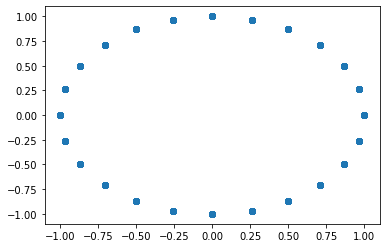

In [115]:
plt.scatter(train['hour_cos'],train['hour_sin'])

In [116]:
train

,hour_bef_temperature,hour_bef_visibility,count,hour_sin,hour_cos
0,16.3,576.0,49.0,-0.866025,5.000000e-01
1,20.1,916.0,159.0,-0.258819,-9.659258e-01
2,13.9,1382.0,26.0,1.000000,6.123234e-17
3,8.1,946.0,57.0,-0.258819,9.659258e-01
4,29.5,2000.0,431.0,-1.000000,-1.836970e-16
...,...,...,...,...,...
1454,16.8,2000.0,21.0,0.866025,5.000000e-01
1455,10.8,2000.0,20.0,0.707107,7.071068e-01
1456,18.3,2000.0,22.0,0.965926,2.588190e-01
1457,20.7,1395.0,216.0,-0.707107,7.071068e-01


## 모델 정의 및 학습

In [117]:

# 트레인 데이터에서 라벨을 빼주는 것!

train_x = train.drop(['count'],axis = 1)
train_y = train['count']

In [118]:
# 하이퍼 파라미터 튜닝
from sklearn.model_selection import RandomizedSearchCV



#http://aispiration.com/model/model-python-cross-validation.html

#param list라는 dictionary에 담아두면, 함수를 통해 RandomizedSearchCV가 여기서 랜덤하게 뽑아준다.

#여기서 파라미터는 생각대로 설정.
param_list = {"n_estimators": list(range(10, 1000, 10)), # 나무의 수
               "max_depth": list(range(1, 20, 2)),
              "min_samples_leaf": [1, 2, 4],
               "max_features":[1,2,3],
                "min_samples_split":list(range(2, 20, 2)),
             } # 

rf = RandomForestRegressor(oob_score=True, random_state=1234)

rf_random_search = RandomizedSearchCV(
        estimator=rf,
        param_distributions = param_list,
        n_iter = 100,
        cv = 5,
        n_jobs=-1, # 가능한 모든 자원을 쓴다는 뜻.
        scoring = 'neg_root_mean_squared_error',
        verbose=2)

# neg_root_mean_squared_error : 오차가 올라가면 나쁘다는 의미.

rf_random_search.fit(train_x, train_y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   30.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.9min finished


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(oob_score=True,
                                                   random_state=1234),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15,
                                                      17, 19],
                                        'max_features': [1, 2, 3],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              12, 14, 16, 18],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 150,
                                                         160, 170, 180, 190,
                                          

In [120]:
rf_random_search.best_params_

{'n_estimators': 810,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 3,
 'max_depth': 7}

In [121]:
model = RandomForestRegressor(n_estimators=810,
                              min_samples_split=10,
                              min_samples_leaf=1,
                              max_features=3,
                              max_depth=7,
                              n_jobs=-1,
                              random_state=1234
                             )
model.fit(train_x,
          train_y)

RandomForestRegressor(max_depth=7, max_features=3, min_samples_split=10,
                      n_estimators=810, n_jobs=-1, random_state=1234)

## 학습 된 모델로 예측 데이터 생성

In [122]:
test

,hour_bef_temperature,hour_bef_visibility,hour_sin,hour_cos
0,20.7,954.0,0.965926,-2.588190e-01
1,30.0,1590.0,-0.965926,-2.588190e-01
2,19.0,193.0,-0.258819,-9.659258e-01
3,22.5,1185.0,1.000000,6.123234e-17
4,14.6,218.0,-0.500000,8.660254e-01
...,...,...,...,...
710,24.6,1745.0,0.258819,9.659258e-01
711,18.1,2000.0,0.258819,9.659258e-01
712,23.3,1789.0,0.707107,-7.071068e-01
713,27.0,1956.0,-0.866025,-5.000000e-01


In [123]:
pred = model.predict(test)

In [124]:
pred

array([122.92766782, 240.07151947, 106.11097396,  60.46347748,
        72.3056783 , 119.155874  , 271.80903571, 343.04385843,
        52.59923137, 130.42980042, 262.86099598, 252.67636894,
       121.09583085,  48.02302921, 147.88190045, 149.72480404,
        24.41745524, 223.03691914, 367.36280006, 191.71066739,
       205.22192125,  87.61550075,  50.67567024, 141.45809788,
       143.2940325 , 101.69162743,  21.80858939, 107.18632355,
       113.91841625, 156.2788229 ,  94.58989661,  39.07757346,
        65.98249659, 136.1518778 , 241.85778445,  52.48013556,
       181.08992616, 231.27227469, 197.6941829 , 106.41084329,
        57.22908245, 111.80705726, 157.89949572,  77.1383784 ,
       283.42592557, 198.30823294, 107.30222222,  61.3120784 ,
        19.13351959,  93.83188355, 240.02711108,  99.28773168,
       177.44430583, 145.59281632, 182.00913863, 159.18228254,
        49.96699831, 192.75940624,  50.62174768,  18.42022   ,
       104.47365871,  81.68587369, 281.06700044, 255.29

## 제출파일 생성

In [125]:
submission = pd.read_csv('./data/submission.csv')
submission

,id,count
0,0,1
1,1,1
2,2,1
3,4,1
4,5,1
...,...,...
710,2148,1
711,2149,1
712,2165,1
713,2166,1


In [126]:
submission['count'] = pred

In [127]:
submission

,id,count
0,0,122.927668
1,1,240.071519
2,2,106.110974
3,4,60.463477
4,5,72.305678
...,...,...
710,2148,63.614594
711,2149,58.616158
712,2165,113.917036
713,2166,218.645699


In [128]:
submission.to_csv('베이스라인.csv',index = False)

# 베이스라인 코드를 보면서 생각한 것


1. RandomForest 하이퍼 파라미터 서치를 해보자.
2. 결측치를 다 0으로 채워주면 될까? 그 시간대 별 평균을 넣을까?
3. 시간 변수가 1~24로 되있는데, circular하게 바꾸면 어떨까? encoding (전처리)
4. 시간대별 분포를 보고, 변수를 추가해볼까? (feature engineering)
5. 수치형 변수들이 많으니 xgboost를 이용해볼까.
6. 해당 데이터의 계절을 알 방법이 없을까? 계절에 따라 탑승량이 다를까?
7. 당연히 id 컬럼은 빼야지
8. 예측했더니 소수점이 발생한다. 정수형을 예측해야하니 버림 하자.
9. 분포 모양을 보고, 정규분포 형태로 바꿔주자.

추가 아이디어를 EDA를 통해 확인해보자!
